<font size="5.5"><u><i>Apply ResNet50</i></u></font>

<font size="4">Script to apply the RESNET50 model using TF images.</font>
<br/>
<font size="4">Author: Manuel David Morales</font>

<font size="4">*This code has been adapted to be run on Google Colaboratory*</font>

In [ ]:
# Mount Google Drive repository

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1) Library imports

In [ ]:
# Data analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Machine/Deep learning tools
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
#from keras.utils import layer_utils
#from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import tensorflow.keras.backend as K
# Image dataset has channels as its last dimensions
K.set_image_data_format('channels_last')

# Files/folders management
import os, glob

# To read csv files
import csv

# Garbage collector
import gc

# Image management
from PIL import Image

## 2) Input parameters

In [ ]:
# Interferometer combination
# -------------------------------------------------------------------------------------
detectors = ["L1", "H1", "V1"]    # Options (combinations included): "L1", "H1", "V1"
# -------------------------------------------------------------------------------------

## 3) Read files

In [ ]:
# ------> Specify folder location

data_dir = '/content/drive/MyDrive/Colab Notebooks/GitHub/CCSNeHFGW_ResNetClass/Datasets/Backup/'
print("TF datasets are located at:", data_dir)
print("")

TF datasets are located at: /content/drive/MyDrive/Colab Notebooks/GitHub/CCSNeHFGW_ResNetClass/Datasets/Backup/



In [ ]:
# ---------------------------------------------------------
# ------> Image sample files reader
# ---------------------------------------------------------

def load_imagedata(folder_path, class_samples):

    """
    Function to load image samples for a given image class.

    INPUT:
            folder_path    -> Folder path
            class_samples  -> Dictionary, to save image
                              samples for each class (key)

    OUTPUT:
            class_samples  -> Updated samples dictionary
            Num_samples    -> No. of loaded image samples
    """

    os.chdir(folder_path)

    count_files = 0

    class_label = folder_path[-1]

    images_onelabel = []

    for file in sorted(glob.glob("TF_sample_*.npy")):

        #print("READING", file, "FILE")
        img_sample = np.load(data_dir + folder + "/" + file)

        # Check: Plot TF images
        #plt.figure(count_files, figsize=(2,2))
        #img = Image.fromarray(img_sample)
        #imshow(img)
        #plt.show()
        #plt.figure(count_files).clear()
        #plt.close()
        #gc.collect()

        images_onelabel.append(img_sample)
        count_files += 1

    class_samples["class " + class_label] = images_onelabel

    Num_samples = count_files

    return class_samples, Num_samples

In [ ]:
# Initialize list for image data
image_ifos = []

# Initialize images count
Num_images = 0

# Remark: each element of image_ifos list contains
# data from each selected interferometric detector

# ------> Loop: Interferometric detectors

for ifo in detectors:

    os.chdir(data_dir)

    print("DATA from detector:", ifo)
    print("======================== ")

    # Initialize images count for each segment
    Num_images_seg = 0

    # Initialize dictionary for images
    class_images = {}

    # ------> Loop: Class of the images

    for folder in glob.glob(ifo + "*"):

        print("SCANNING", folder, "FOLDER")
        print("------------------------------------------")

        class_images, Num_images_ifo = load_imagedata(data_dir + folder, class_images)
        Num_images_seg = Num_images_seg + Num_images_ifo

    Num_images = Num_images + Num_images_seg

    image_ifos.append(class_images)

    print("Loaded images: ", Num_images_seg)
    print("")

print("Total number of loaded images: ", Num_images)

DATA from detector: L1
SCANNING L1_TF_samples_c1 FOLDER
------------------------------------------
SCANNING L1_TF_samples_c2 FOLDER
------------------------------------------
SCANNING L1_TF_samples_c3 FOLDER
------------------------------------------
Loaded images:  3053

DATA from detector: H1
SCANNING H1_TF_samples_c1 FOLDER
------------------------------------------
SCANNING H1_TF_samples_c2 FOLDER
------------------------------------------
SCANNING H1_TF_samples_c3 FOLDER
------------------------------------------
Loaded images:  3039

DATA from detector: V1
SCANNING V1_TF_samples_c1 FOLDER
------------------------------------------
SCANNING V1_TF_samples_c2 FOLDER
------------------------------------------
SCANNING V1_TF_samples_c3 FOLDER
------------------------------------------
Loaded images:  3066

Total number of loaded images:  9158


## 4) Images preparation

In [ ]:
# ------> For each class, join together all image samples

# Initialize lists for each class
images_label1 = []
images_label2 = []
images_label3 = []

# Stacks all arrays of image_ifos[i]["class c"]
# (with i=1,...,N_ifos, c={1,2,3}), as a single array
for i in range(len(image_ifos)):

  images_label1_seg = np.stack(image_ifos[i]["class 1"])
  images_label2_seg = np.stack(image_ifos[i]["class 2"])
  images_label3_seg = np.stack(image_ifos[i]["class 3"])

  images_label1.append(images_label1_seg)
  images_label2.append(images_label2_seg)
  images_label3.append(images_label3_seg)

# For each class, concatenate numpy arrays
images_c1 = np.concatenate(images_label1, axis=0)
images_c2 = np.concatenate(images_label2, axis=0)
images_c3 = np.concatenate(images_label3, axis=0)

In [ ]:
# ------> Check dimensions

print("Class 1 images:", images_c1.shape)
print("Class 2 images:", images_c2.shape)
print("Class 3 images:", images_c3.shape)

Class 1 images: (3057, 64, 64, 3)
Class 2 images: (3053, 64, 64, 3)
Class 3 images: (3048, 64, 64, 3)


(-0.5, 63.5, 63.5, -0.5)

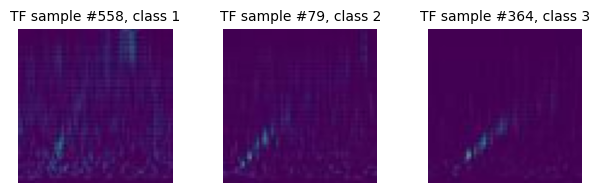

In [ ]:
# ------> Check: Plot one random image per class

RandInd1 = np.random.choice(len(images_c1))
RandInd2 = np.random.choice(len(images_c2))
RandInd3 = np.random.choice(len(images_c3))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7.5, 2))

img = Image.fromarray(images_c1[RandInd1])
ax1.imshow(img)
ax1.set_title('TF sample #' + str(RandInd1) + ", class 1", fontsize=10)
ax1.axis('off')

img = Image.fromarray(images_c2[RandInd2])
ax2.imshow(img)
ax2.set_title('TF sample #' + str(RandInd2) + ", class 2", fontsize=10)
ax2.axis('off')

img = Image.fromarray(images_c3[RandInd3])
ax3.imshow(img)
ax3.set_title('TF sample #' + str(RandInd3) + ", class 3", fontsize=10)
ax3.axis('off')

In [ ]:
# ------> Define vectors for target labels

# Remark: For a direct and easy application of functions and libraries,
# we relabel classes with 0, 1, and 2, maintaining the original ordinality.
# (In figures we keep original tags 1, 2, and 3).

y_0 = np.empty(len(images_c1)); y_0.fill(0)
y_0 = y_0.astype(int)

y_1 = np.empty(len(images_c2)); y_1.fill(1)
y_1 = y_1.astype(int)

y_2 = np.empty(len(images_c3)); y_2.fill(2)
y_2 = y_2.astype(int)

In [ ]:
# ------> Concatenate numpy arrays

X_data = np.concatenate((images_c1, images_c2, images_c3), axis=0)
y_data = np.concatenate((y_0, y_1, y_2), axis=0)

print(X_data.shape)
print(y_data.shape)

(9158, 64, 64, 3)
(9158,)


## 5) Split: Train / Validation / Test

In [ ]:
# Train (70%) and Test (30%)
train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(X_data, y_data, test_size=0.3, random_state=43)

# Check dimensions

print("Images' dimensions:",  train_set_x_orig.shape, test_set_x_orig.shape)
print("")
print("Labels' dimensions:", train_set_y_orig.shape, test_set_y_orig.shape)

Images' dimensions: (6410, 64, 64, 3) (2748, 64, 64, 3)

Labels' dimensions: (6410,) (2748,)


In [ ]:
# Train (90%) and Validation (10%)
train_set_x_orig, vali_set_x_orig, train_set_y_orig, vali_set_y_orig = train_test_split(train_set_x_orig, train_set_y_orig, test_size=0.1, random_state=43)

# Check dimensions
print("Images' dimensions:",  train_set_x_orig.shape, vali_set_x_orig.shape)
print("")
print("Labels' dimensions:", train_set_y_orig.shape, vali_set_y_orig.shape)

Images' dimensions: (5769, 64, 64, 3) (641, 64, 64, 3)

Labels' dimensions: (5769,) (641,)


In [ ]:
# Target labels' unique values
classes = np.unique(test_set_y_orig)
print(classes)

[0 1 2]


In [ ]:
# Reshape arrays for target labels
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
print(train_set_y_orig.shape)

vali_set_y_orig = vali_set_y_orig.reshape((1, vali_set_y_orig.shape[0]))
print(vali_set_y_orig.shape)

test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
print(test_set_y_orig.shape)

(1, 5769)
(1, 641)
(1, 2748)


## 6) Features preparation

In [ ]:
# SOME FUNCTIONS

# One hot conversion
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Plot images
def plotImages(images_arr, labels):
  fig, axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for ax, img in zip(axes, images_arr):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
  print(labels[0][0:10])

In [ ]:
# Normalize image vectors
X_train = train_set_x_orig/255
X_vali = vali_set_x_orig/255
X_test  = test_set_x_orig/255

In [ ]:
# Convert training and test labels to one-hot matrices
y_train = convert_to_one_hot(train_set_y_orig, classes.shape[0]).T
y_vali = convert_to_one_hot(vali_set_y_orig, classes.shape[0]).T
y_test = convert_to_one_hot(test_set_y_orig, classes.shape[0]).T

In [ ]:
# Some checks

print ("No. of training samples = " + str(X_train.shape[0]))
print ("No. of validations samples = " + str(X_vali.shape[0]))
print ("No. of test samples = " + str(X_test.shape[0]))

# Note channels are last dimensions for images
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))

print ("X_vali shape: " + str(X_vali.shape))
print ("y_vali shape: " + str(y_vali.shape))

print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

No. of training samples = 5769
No. of validations samples = 641
No. of test samples = 2748
X_train shape: (5769, 64, 64, 3)
y_train shape: (5769, 3)
X_vali shape: (641, 64, 64, 3)
y_vali shape: (641, 3)
X_test shape: (2748, 64, 64, 3)
y_test shape: (2748, 3)


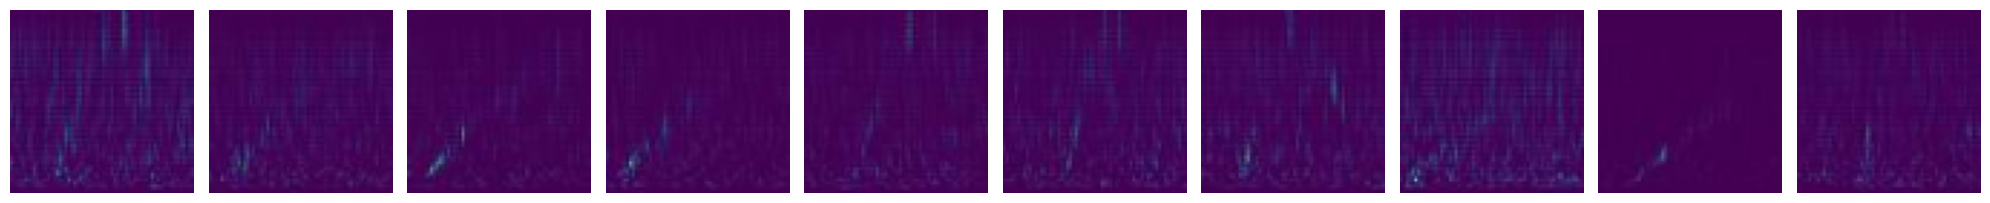

[0 1 1 1 0 0 0 2 2 0]


In [ ]:
# More checks:
plotImages(X_train, train_set_y_orig)

## 7) ResNet50 architecture

**1st STEP: DEFINE IDENTITY BLOCK**

In [ ]:
def identity_block(X, f, filters, stage, block):

  '''
  Implementation of identity

  Arguments:
  X -       input tensor to the block of shape (m, n_H_prev, n_W_prev, n_C_prev)
  f -       defines shape of filter in the middle layer of the main path
  filters - list of integers, defining the number of filters in each layer of the main path
  stage -   defines the block position in the network
  block -   used for naming convention

  Returns:
  X - output is a tensor of shape (n_H, n_W, n_C) which matches (m, n_H_prev, n_W_prev, n_C_prev)
  '''

  # defining base name for block
  conv_base_name = 'res' + str(stage) + block + '_'
  bn_base_name = 'bn' + str(stage) + block + '_'

  # retrieve number of filters in each layer of main path
  # NOTE: f3 must be equal to n_C. That way dimensions of the third component will match the dimension of original input to identity block
  f1, f2, f3 = filters

  # Batch normalization must be performed on the 'channels' axis for input. It is 3, for our case
  bn_axis = 3

  # save input for "addition" to last layer output; step in skip-connection
  X_skip_connection = X

  # ----------------------------------------------------------------------
  # Building layers/component of identity block using Keras functional API

  # First component/layer of main path
  X = Conv2D(filters= f1, kernel_size = (1,1), strides = (1,1), padding='valid', name=conv_base_name+'first_component', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=bn_axis, name=bn_base_name+'first_component')(X)
  X = Activation('relu')(X)

  # Second component/layer of main path
  X = Conv2D(filters= f2, kernel_size = (f,f), strides = (1,1), padding='same', name=conv_base_name+'second_component', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=bn_axis, name=bn_base_name+'second_component')(X)
  X = Activation('relu')(X)

  # Third component/layer of main path
  X = Conv2D(filters= f3, kernel_size = (1,1), strides = (1,1), padding='valid', name=conv_base_name+'third_component', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=bn_axis, name=bn_base_name+'third_component')(X)

  # "Addition step" - skip-connection value merges with main path
  # NOTE: both values have same dimensions at this point, so no operation is required to match dimensions
  X = Add()([X, X_skip_connection])
  X = Activation('relu')(X)

  return X

**2nd STEP: DEFINE CONVOLUTION**

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in above figure

    Arguments:
    X -       input tensor to the block of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -       defines shape of filter in the middle layer of the main path
    filters - list of integers, defining the number of filters in each layer of the main path
    stage -   defines the block position in the network
    block -   used for naming convention
    s -       specifies the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining base name for block
    conv_base_name = 'res' + str(stage) + block + '_'
    bn_base_name = 'bn' + str(stage) + block + '_'

    # retrieve number of filters in each layer of main path
    f1, f2, f3 = filters

    # Batch normalization must be performed on the 'channels' axis for input. It is 3, for our case
    bn_axis = 3

    # save input for "addition" to last layer output; step in skip-connection
    X_skip_connection = X

    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(f1, (1, 1), strides = (s,s), padding = 'valid', name = conv_base_name + 'first_component', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = bn_axis, name = bn_base_name + 'first_component')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(f2,  kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_base_name + 'second_component', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = bn_axis, name = bn_base_name + 'second_component')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(f3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_base_name + 'third_component', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = bn_axis, name = bn_base_name + 'third_component')(X)

    ##### Convolve skip-connection value to match its dimensions to third layer output's dimensions ####
    X_skip_connection = Conv2D(f3, (1, 1), strides = (s,s), padding = 'valid', name = conv_base_name + 'merge', kernel_initializer = glorot_uniform(seed=0))(X_skip_connection)
    X_skip_connection = BatchNormalization(axis = 3, name = bn_base_name + 'merge')(X_skip_connection)

    # "Addition step"
    # NOTE: both values have same dimensions at this point
    X = Add()([X, X_skip_connection])
    X = Activation('relu')(X)

    return X

**3rd STEP: JOIN TOGETHER STACKS, RESNET50**

In [ ]:
def ResNet50(input_shape = (64, 64, 3), classes = 6):
    """
    Arguments:
    input_shape - shape of the images of the dataset
    classes - number of classes

    Returns:
    model - a Model() instance in Keras

    """

    # plug in input_shape to define the input tensor
    X_input = Input(input_shape)

    # Zero-Padding : pads the input with a pad of (3,3)
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv_1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # NOTE: dimensions of filters that are passed to identity block are such that final layer output
    # in identity block mathces the original input to the block
    # blocks in each stage are alphabetically sequenced

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # Average Pooling
    X = AveragePooling2D((2, 2), name='avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

## 8) Train and test

In [ ]:
model = ResNet50(input_shape = (64, 64, 3), classes = 3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 28, validation_data = (X_vali, y_vali))

Epoch 1/20
207/207 [==============================] - 55s 65ms/step - loss: 0.3812 - accuracy: 0.9229 - val_loss: 0.8020 - val_accuracy: 0.5959
Epoch 2/20
207/207 [==============================] - 10s 50ms/step - loss: 0.0508 - accuracy: 0.9854 - val_loss: 0.1199 - val_accuracy: 0.9626
Epoch 3/20
207/207 [==============================] - 10s 50ms/step - loss: 0.0844 - accuracy: 0.9802 - val_loss: 0.1379 - val_accuracy: 0.9563
Epoch 4/20
207/207 [==============================] - 10s 49ms/step - loss: 0.0288 - accuracy: 0.9932 - val_loss: 0.0261 - val_accuracy: 0.9938
Epoch 5/20
207/207 [==============================] - 10s 49ms/step - loss: 0.0417 - accuracy: 0.9884 - val_loss: 0.0231 - val_accuracy: 0.9922
Epoch 6/20
207/207 [==============================] - 10s 50ms/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 7/20
207/207 [==============================] - 11s 51ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.0052 - val_accuracy:

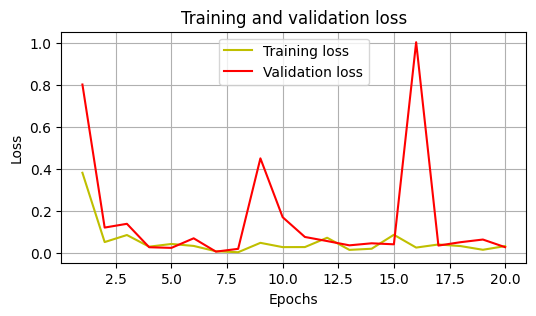

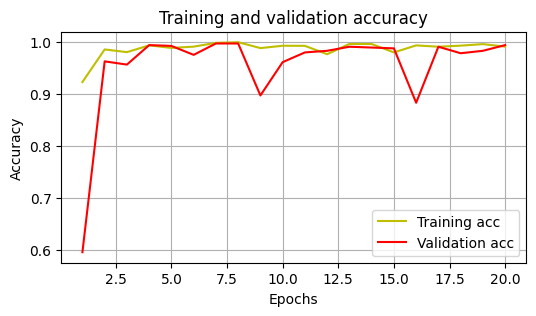

In [ ]:
# ------> Plot loss and accuracy during the training and validation

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Epochs
epochs = range(1, len(loss) + 1)

# Plot the curves

plt.figure(figsize=(6,3))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(6,3))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predictions = model.evaluate(X_test, y_test)
print("Loss = " + str(predictions[0]))
print("Test Accuracy = " + str(predictions[1]))

86/86 [==============================] - 2s 14ms/step - loss: 0.0433 - accuracy: 0.9916
Loss = 0.04328364133834839
Test Accuracy = 0.9916302561759949


## 9) Model evaluation

In [ ]:
# ------> Obtain prediccions of the model

predictions = model.predict(X_test)
print("Predictions dim:", predictions.shape)

predicted_labels = np.zeros(len(predictions))

for i in range(len(predictions)):
    predicted_labels[i] = int(np.argmax(predictions[i]))
print("Predicted labels dim:", predicted_labels.shape)

print("")
print("-----------------------")
print("For instance, two predictions:")
print("")
print("prediction: ", predictions[0])
print("predicted_label: ", predicted_labels[0])
print("")
print("prediction: ", predictions[4])
print("predicted_label: ", predicted_labels[4])

86/86 [==============================] - 2s 12ms/step
Predictions dim: (2748, 3)
Predicted labels dim: (2748,)

-----------------------
For instance, two predictions:

prediction:  [1.8966240e-08 3.2040634e-10 1.0000000e+00]
predicted_label:  2.0

prediction:  [9.9998665e-01 1.3400140e-05 3.1529307e-08]
predicted_label:  0.0


In [ ]:
# One hot deconversion
def deconvert_from_one_hot(Y):

    Y_out = np.zeros(len(Y))

    for i in range(len(Y)):
      Y_out[i] = np.argmax(Y[i])
    return Y_out

In [ ]:
# ------> Compute the confusion matrix

# Remark: Columns --> Prediction labels
#         Rows    --> Real labels

y_test_orig = deconvert_from_one_hot(y_test)

y_test_orig = y_test_orig.astype(int)
predicted_labes = predicted_labels.astype(int)

cnf_matrix = tf.math.confusion_matrix(y_test_orig, predicted_labels, num_classes=None)
print(cnf_matrix)

tf.Tensor(
[[929   1   1]
 [  5 901   3]
 [  4   9 895]], shape=(3, 3), dtype=int32)


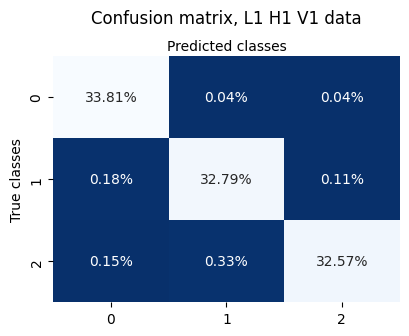

In [ ]:
import seaborn as sns
class_names = ['Class 1','Class 2', 'Class 3']
ifo_conf = ' '.join(detectors)

plt.rcParams["figure.figsize"] = [4.0, 3.0]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot = True, cmap = 'Blues_r', fmt='.2%', cbar=False)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix, ' + ifo_conf + ' data', y = 1.1)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.show()

In [ ]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# ------> Specify folder location to save models

models_dir = '/content/drive/MyDrive/Colab Notebooks/GitHub/CCSNeHFGW_ResNetClass/Models/'
print("Models are saved in the folder:", models_dir)

**SAVE CURRENT MODEL**

In [ ]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# ------> Save current Deep Learning Model

ifo_conf = ''.join(detectors)
model.save(models_dir + "ResNet50_" + ifo_conf + ".keras")

In [ ]:
%%script false --no-raise-error # WARNING: DEACTIVATED CELL

# ------> Load current Deep Learning Model

ResNet50_L1 = load_model(models_dir + "ResNet50_L1.keras")
predictions = ResNet50_L1.evaluate(X_test, y_test)
print(predictions)